## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Credit information
Learn and estimate the Home Credit Default Risk competition on Kaggle

[!Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk)

## Problem 1: Confirmation of competition contents

Read the overview page of the competition and check the following points about "Home Credit Default Risk".

<li>What to learn and what to predict?
<li>What kind of file to create and submit to Kaggle?
<li>What kind of index value will be used to evaluate the submissions?</li>

### Answer
<li> Data used to learn maybe the transactional information
<li> Predict the client's repayment abilities
<li>
    
    
The first step is to create a baseline model using a simple method. This model is the standard for accuracy.


It does not need to be highly accurate. The goal is to be able to run without errors and submit estimates to Kaggle.

## Problem 2: Learning and verification

Create and execute a series of steps from easy analysis, preprocessing, learning, and verification of data.


For verification, please use the evaluation metrics used in this competition. The method used for learning is not specified.

### Training Data

In [67]:
data = pd.read_csv('application_train.csv')
data.shape

(307511, 122)

### Testing Data

In [68]:
test_data = pd.read_csv('application_test.csv')
test_data.shape

(48744, 121)

There are 122 features and more than 300k data points.

### Target Column

In [69]:
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

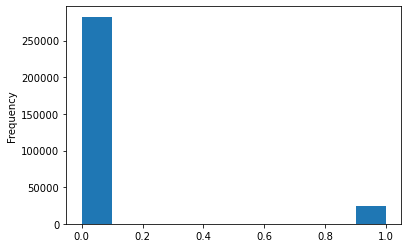

In [70]:
data['TARGET'].astype(int).plot.hist();

<li>1: client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
<li>0: all other cases</li>

### Data Types

In [71]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Missing value

In [72]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [73]:
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Option for missing values:
<li> Drop Columns
<li> Imputation

In [74]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding categorical data
<li> One hot encoding: i will use it for feature with only 2 unique values
<li> Label encoding: i will use for the rest of categorical data
<li> Encode both train set and test set

In [75]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            test_data[col] = le.transform(test_data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [76]:
print('Training Features shape: ', data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [82]:
data_train = pd.get_dummies(data.drop(['TARGET'], axis=1))
data_test = pd.get_dummies(test_data)
print('Training Features shape: ', data_train.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 239)


Training set has more columns than test set that mean some value is not available in the test set.
### Aligning Training and Testing Data

In [83]:
train_labels = data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

# Add the target back in
data_train['TARGET'] = train_labels

print('Training Features shape: ', data_train.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [88]:
print('Training Features shape: ', data_train.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
if 'TARGET' in data_train:
    train = data_train.drop(columns = ['TARGET'])
else:
    train = data_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = data_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(data_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


### Training with Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

### Predict

In [98]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [99]:
log_reg_pred

array([0.0653145 , 0.11802828, 0.06837237, ..., 0.06647276, 0.07233902,
       0.08924854])

In [102]:
submit = data_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.065314
1,100005,0.118028
2,100013,0.068372
3,100028,0.070768
4,100038,0.118071


In [103]:
submit.to_csv('log_reg_baseline.csv', index = False)

## Problem 3: Estimation on test data
Perform the estimation on the test data (application_test.csv ) and submit it to Kaggle.


It does not matter if the accuracy is low, as long as the submission is done correctly.

My submission score on Kaggle is only **0.68156**

## Feature engineering
Based on the baseline model, we will make various improvements to the input feature quantities to improve accuracy.

## Problem 4: Feature engineering

To improve accuracy, perform Feature Engineering from the following perspectives.

<li>Which feature to use?
<li>How to preprocess? </li>
    
Summarize what you did and how the evaluation metrics for the validation data turned out. Please conduct at least 5 patterns of training and validation.


If the accuracy is high, please make an estimate for the test data and submit it to Kaggle

### Summary:
<li> I have used all features for the problems
<li> The preprocess include: process null values with imputation, encode categorical data(one hot encoding and label encoding), normalize data